<a href="https://colab.research.google.com/github/zhuzz12/WSC/blob/main/WSC_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winograd Schema Challenge Dataset Exploration 

The Winograd Schema Challenge was introduced both as an alternative to the Turing Test and as a test of a system’s ability to do commonsense reasoning. 
<br>A Winograd schema is a pair of sentences differing in one or two words with a highly ambiguous pronoun, resolved differently in the two sentences, that appears to require commonsense knowledge to be resolved correctly. The examples were designed to be easily solvable by humans but difficult for machines, in principle requiring a deep understanding of the content of the text and the situation it describes.


<br>An example of test questions from the dataset: 

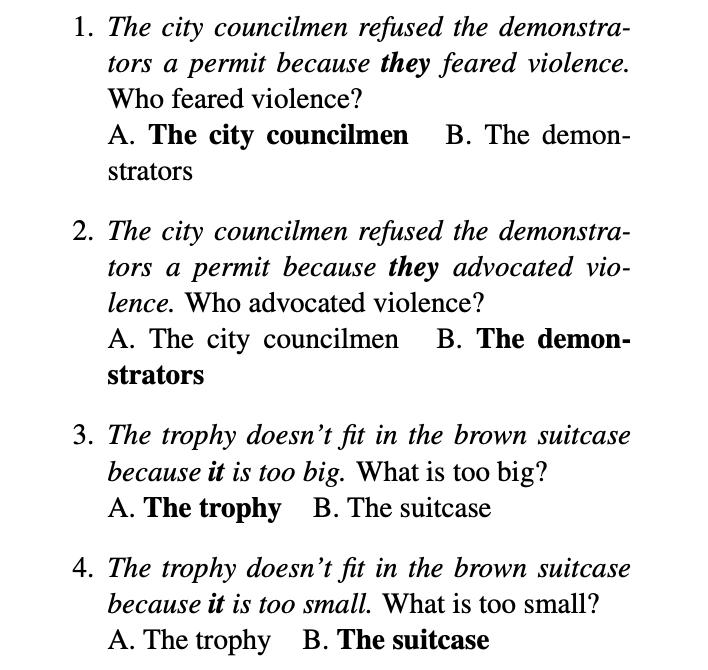


Source: https://arxiv.org/pdf/1907.11983.pdf


**WSC273**, a version of the dataset that contains 273 questions, is analyzed here as it is the most commonly used version of the dataset with more results to compare with. 

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np

Load the WSC273 dataset from the Huggingface dataset

In [ ]:
wsc_dataset = load_dataset("winograd_wsc", "wsc273", split = "test")

In [ ]:
df = wsc_dataset.to_pandas()

Taking a look at the dataset: 

In [ ]:
df

,text,pronoun,pronoun_loc,quote,quote_loc,options,label,source
0,The city councilmen refused the demonstrators ...,they,63,they feared violence,63,"[The city councilmen, The demonstrators]",0,(Winograd 1972)
1,The city councilmen refused the demonstrators ...,they,63,they advocated violence,63,"[The city councilmen, The demonstrators]",1,(Winograd 1972)
2,The trophy doesn't fit into the brown suitcase...,it,55,it is too large,55,"[the trophy, the suitcase]",0,Hector Levesque
3,The trophy doesn't fit into the brown suitcase...,it,55,it is too small,55,"[the trophy, the suitcase]",1,Hector Levesque
4,Joan made sure to thank Susan for all the help...,she,47,she had received,47,"[Joan, Susan]",0,Hector Levesque
...,...,...,...,...,...,...,...,...
268,Madonna fired her trainer because she slept wi...,she,34,she slept,34,"[Madonna, The trainer]",1,Modified from a headline in People Magazine ht...
269,Madonna fired her trainer because she slept wi...,her,49,her boyfriend,49,"[Madonna, The trainer]",0,Modified from a headline in People Magazine ht...
270,Madonna fired her trainer because she couldn't...,her,53,her boyfriend,53,"[Madonna, The trainer]",1,Modified from a headline in People Magazine ht...
271,Carol believed that Rebecca suspected that she...,she,43,she had stolen the watch.,43,"[Carol, Rebecca]",0,Leora Morgenstern


#### List the columns and check the size of the dataset


In [ ]:
print (df.columns)
print ("Shape of the dataset: ", df.shape)

Index(['text', 'pronoun', 'pronoun_loc', 'quote', 'quote_loc', 'options',
       'label', 'source'],
      dtype='object')
Shape of the dataset:  (273, 8)


In [ ]:
print("shape: ", df.shape)

shape:  (273, 8)


**Since we cannot see the full sentences in the dataset presentation, we can look at separate questions (rows) from the dataset:**

The goal is to identify which of the options the pronoun corresponds to, given the quote as the directly related context. 

As the original dataset was later supplied with newer questions, a separate column "source" indicates the source of the questions. 

In [ ]:
sample_ind = 2 # Change to see different questions from the dataset

sample_text = df.loc[sample_ind, "text"]
sample_pronoun = df.loc[sample_ind, "pronoun"]
pronoun_loc = df.loc[sample_ind, "pronoun_loc"]
sample_quote = df.loc[sample_ind, "quote"]
quote_loc = df.loc[sample_ind, "quote_loc"]
sample_options = df.loc[sample_ind, "options"]
sample_label = df.loc[sample_ind, "label"]
sample_source = df.loc[sample_ind, "source"]


print("Sample text: \t\t{}".format(sample_text))
print("Sample pronoun: \t{}".format(sample_pronoun))
print("pronoun loc: \t\t{}".format(pronoun_loc))
print("Sample quote: \t\t{}".format(sample_quote))
print("quote loc: \t\t{}".format(quote_loc))
print("Sample options: \t{}".format(sample_options))
print("Sample label: \t\t{}".format(sample_label))
print("Sample source: \t\t{}".format(sample_source))

Sample text: 		The trophy doesn't fit into the brown suitcase because it is too large.
Sample pronoun: 	it
pronoun loc: 		55
Sample quote: 		it is too large
quote loc: 		55
Sample options: 	['the trophy' 'the suitcase']
Sample label: 		0
Sample source: 		Hector Levesque


Check if we have any null values in the dataset: 

In [ ]:
df.isnull().sum()

text           0
pronoun        0
pronoun_loc    0
quote          0
quote_loc      0
options        0
label          0
source         0
dtype: int64

#### Look at the **sources** the questions are from: 

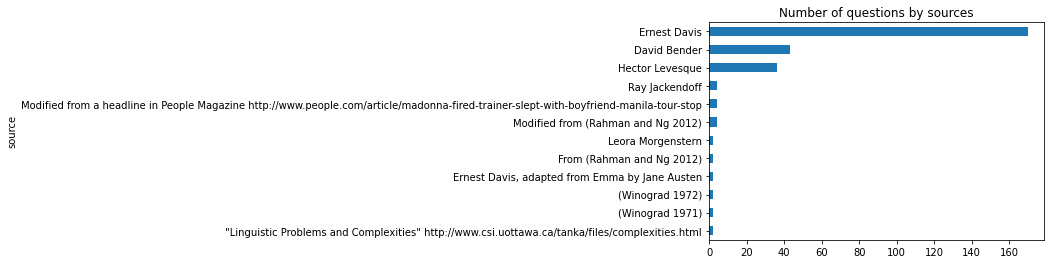

In [ ]:
df.groupby("source")["source"].count().sort_values(ascending=True).plot(kind ='barh', title = 'Number of questions by sources')

#### Look at the frequencies of **pronouns** in question:


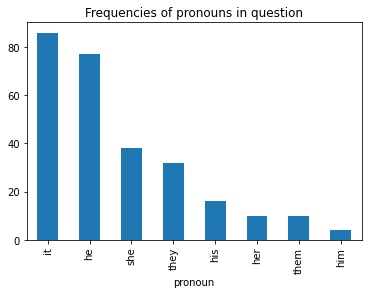

In [ ]:
df.groupby(df["pronoun"].str.lower())["pronoun"].count().sort_values(ascending=False).plot(kind = 'bar', title='Frequencies of pronouns in question')

### Look at the distibution of **length of the text in words**

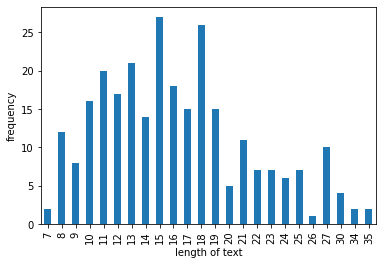

In [ ]:
df.groupby(df['text'].str.split().apply(len))["text"].count().plot(kind='bar', xlabel = 'length of text', ylabel ='frequency')

### Look at the distibution of **length of the quote** by which the pronoun is described

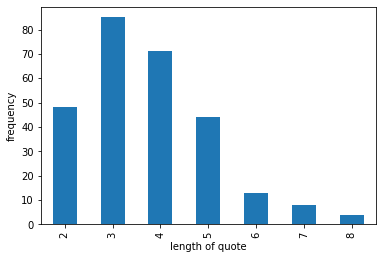

In [ ]:
df.groupby(df['quote'].str.split().apply(len))["quote"].count().plot(kind='bar', xlabel = 'length of quote', ylabel ='frequency')

In [ ]:
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
df_corp= df['text'].str.split()
df_corp= df_corp.values.tolist()
corpus=[word.lower() for i in df_corp for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


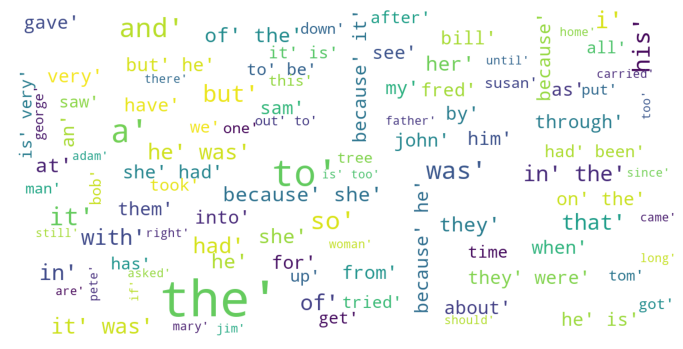

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)
